# Exercise 3

# Problem 1

## Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Importing training dataset

In [2]:
exerciseData = pd.read_csv('train.csv')
exerciseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1: Analysis of Numeric 

### a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

#### assign needed columns into variables for ease of use in code

In [3]:
LotArea = exerciseData['LotArea']
GrLivArea = exerciseData['GrLivArea']
TotalBsmtSF = exerciseData['TotalBsmtSF']
GarageArea = exerciseData['GarageArea']
SalePrice = exerciseData['SalePrice']

#### Ploting out the box plot

<Axes: >

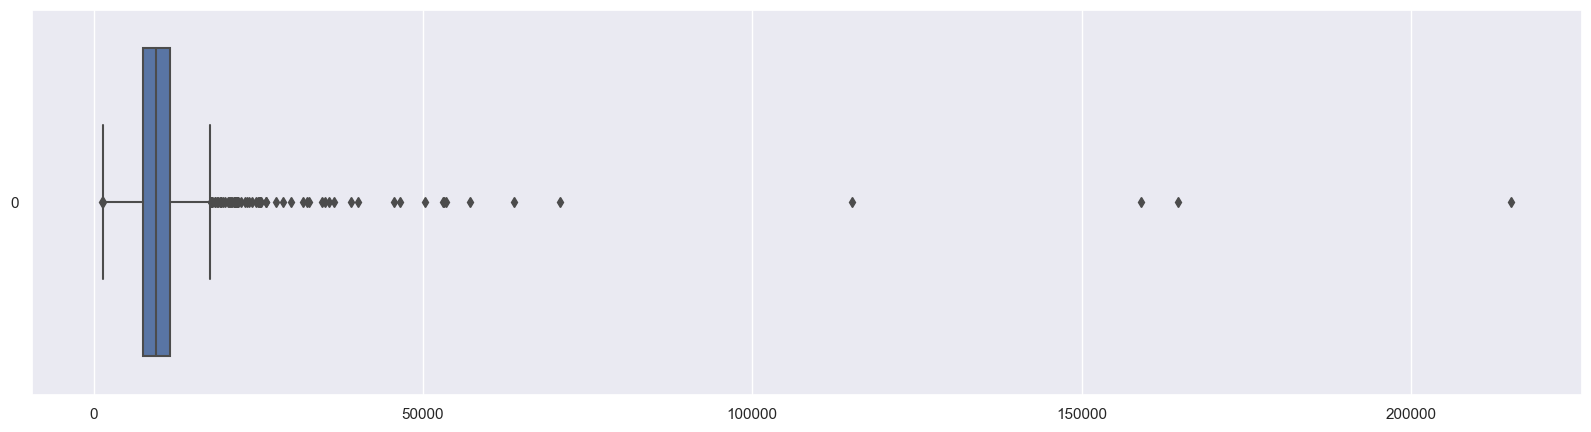

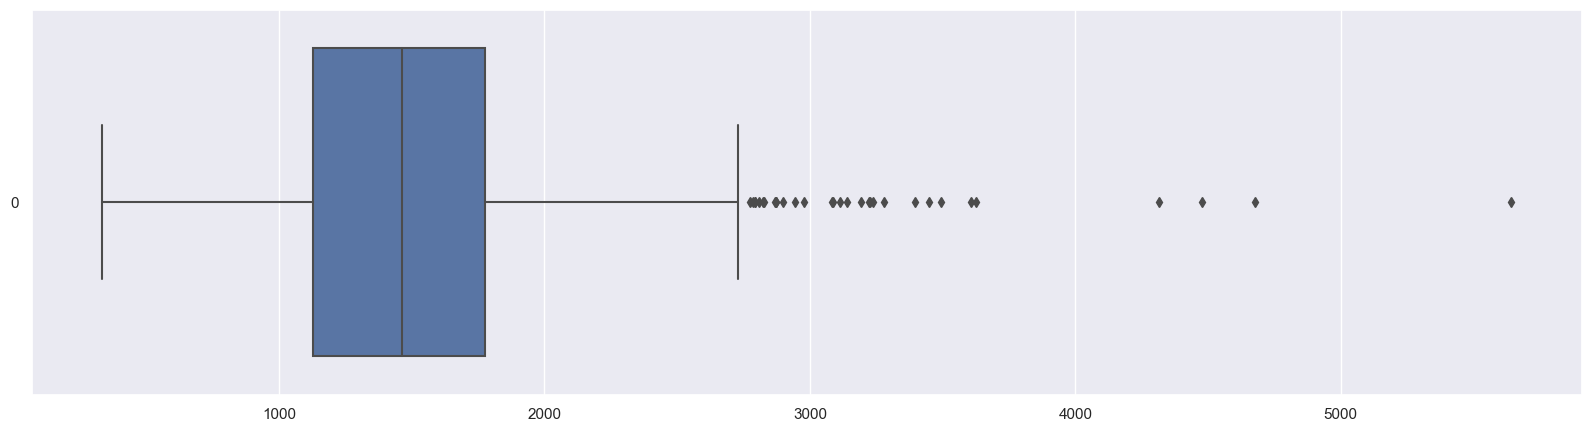

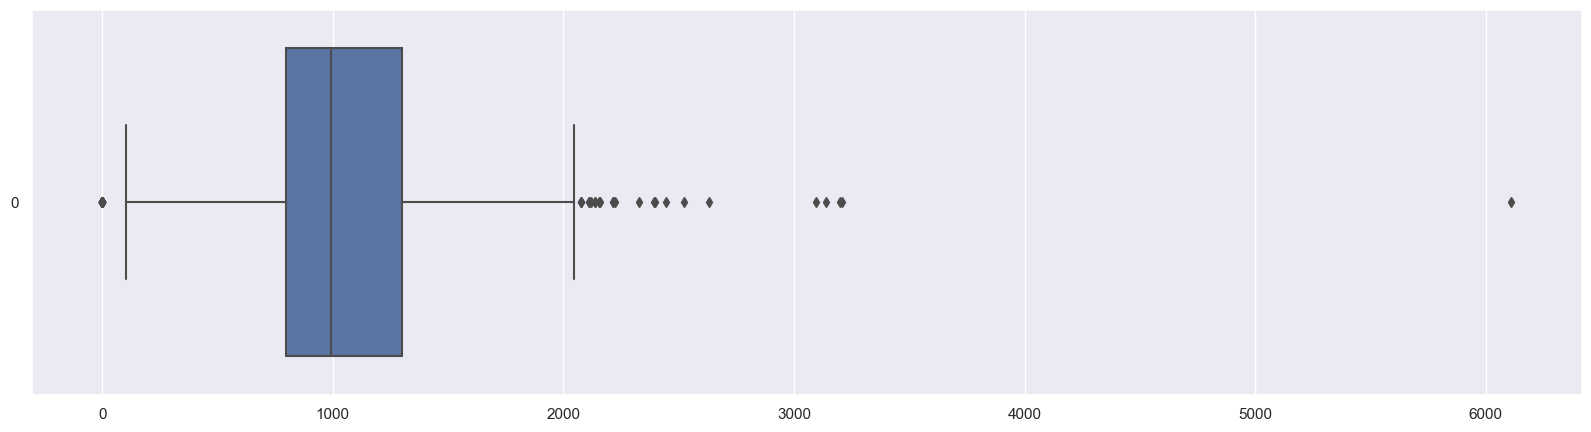

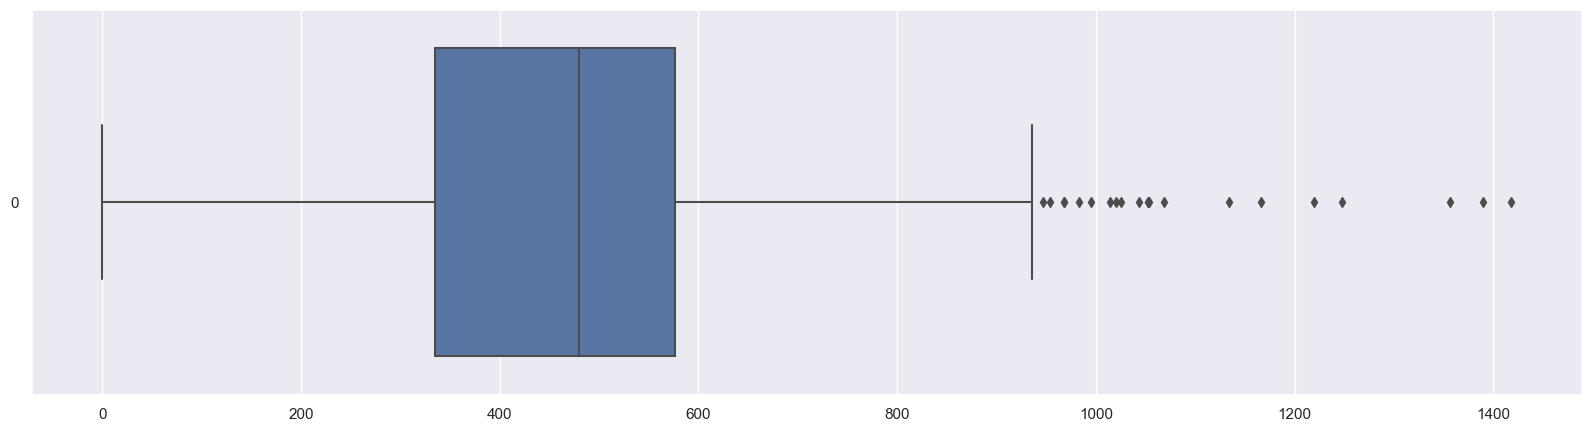

In [4]:
f = plt.figure(figsize = (20,5))
sb.boxplot(data = LotArea, orient = 'h')
f = plt.figure(figsize = (20,5))
sb.boxplot(data = GrLivArea, orient = 'h')
f = plt.figure(figsize = (20,5))
sb.boxplot(data = TotalBsmtSF, orient = 'h')
f = plt.figure(figsize = (20,5))
sb.boxplot(data = GarageArea, orient = 'h')

#### Based on the box plots above, we can infer that LotArea seems to have the most number of outliers. So now in order to confirm that its really so, we write code to count the number of outliers by iterating through each value and checking if its outside of our box and whisker.

In [5]:
def countOutliers(df):
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3-Q1
    count = 0
    
    for i in df:
        if i > (Q3+1.5*IQR) or i < (Q1-1.5*IQR):
            count+=1
            
    return count

print("LotArea outliers: ", countOutliers(LotArea))
print("GrLivArea outliers ", countOutliers(GrLivArea))
print("TotalBsmtSF outliers ", countOutliers(TotalBsmtSF))
print("GarageArea outliers ", countOutliers(GarageArea))


LotArea outliers:  69
GrLivArea outliers  31
TotalBsmtSF outliers  61
GarageArea outliers  21


#### a) Answer: Hence we can confidently conclude that LotArea has the most number of outliers.

### b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

#### For this, we try plotting a KDE chart

<Axes: xlabel='GarageArea', ylabel='Count'>

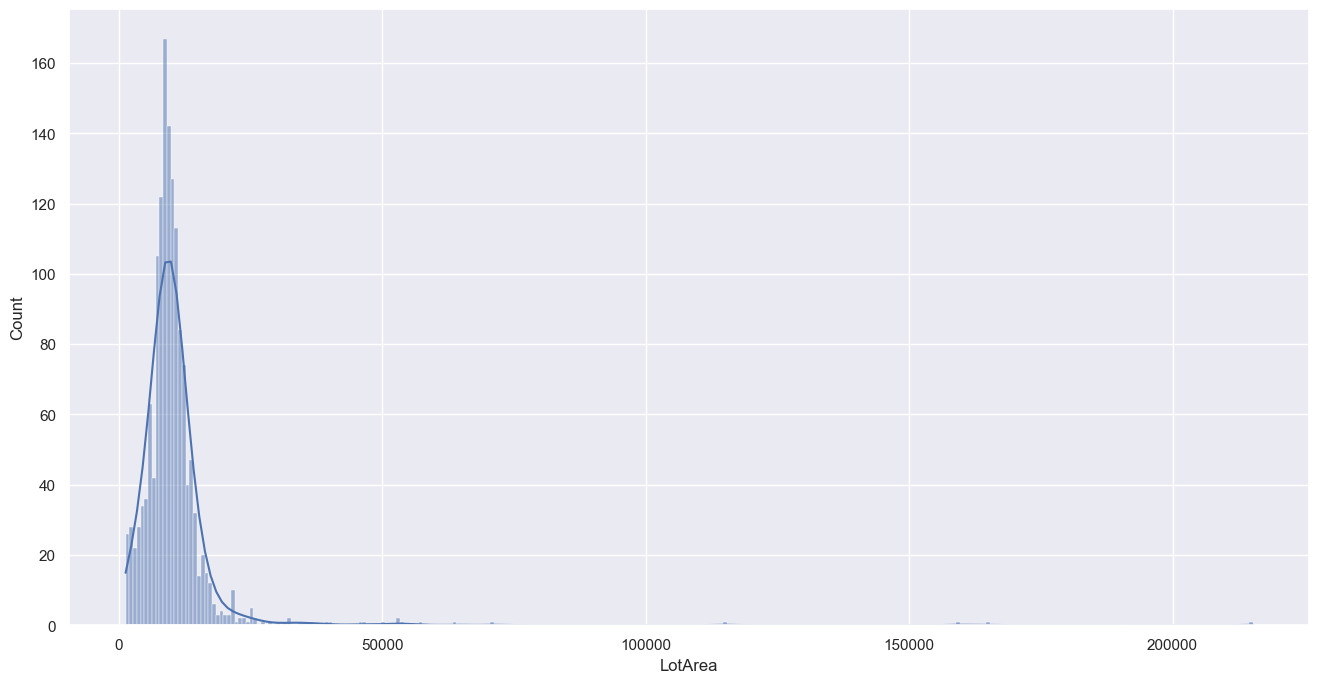

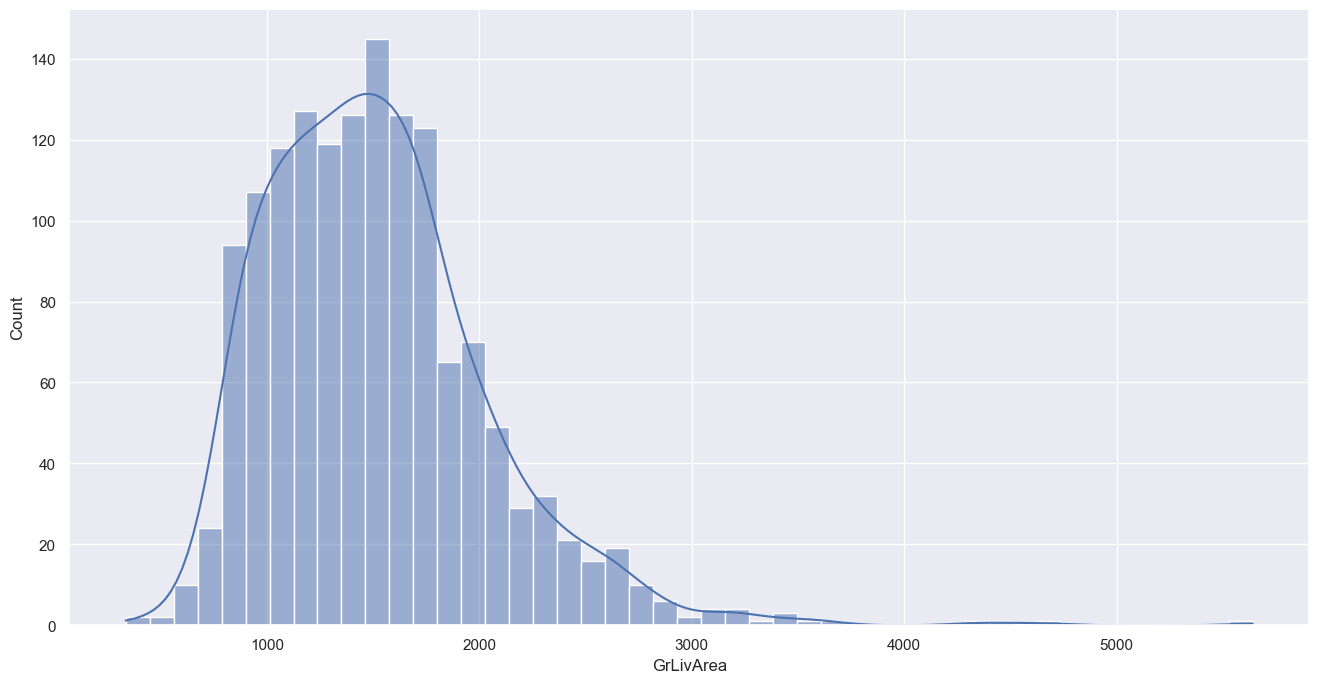

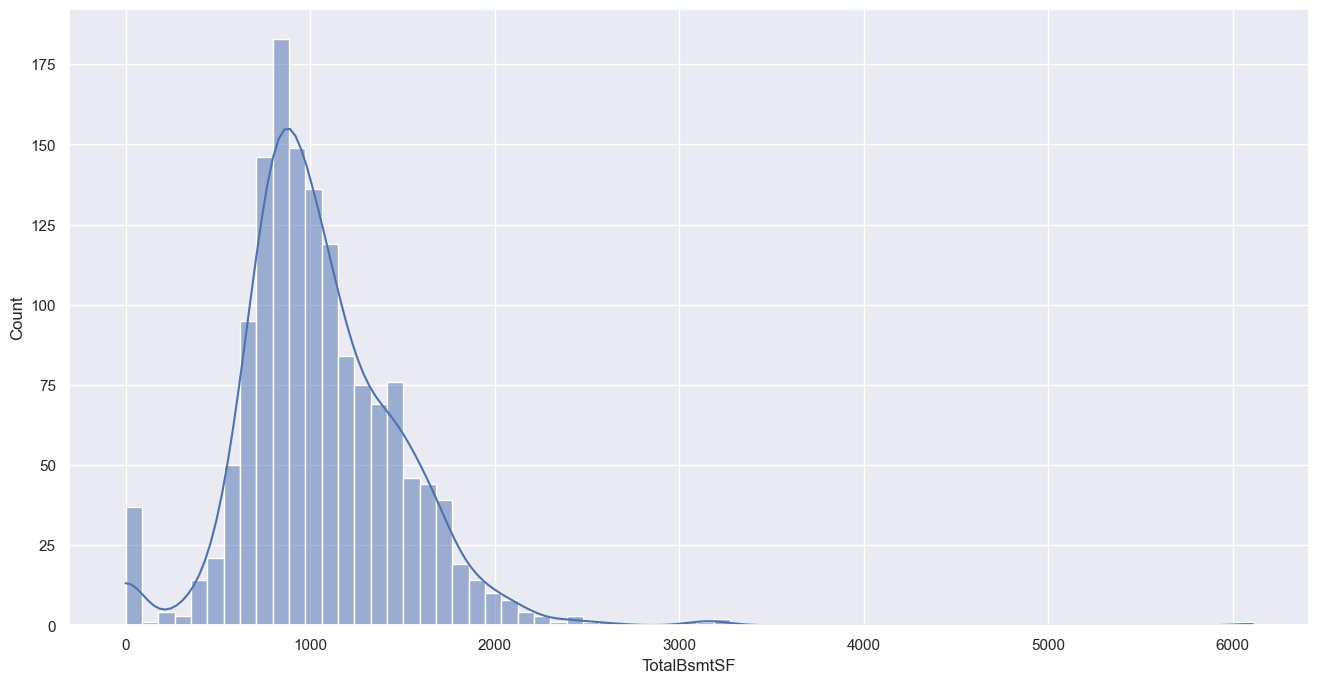

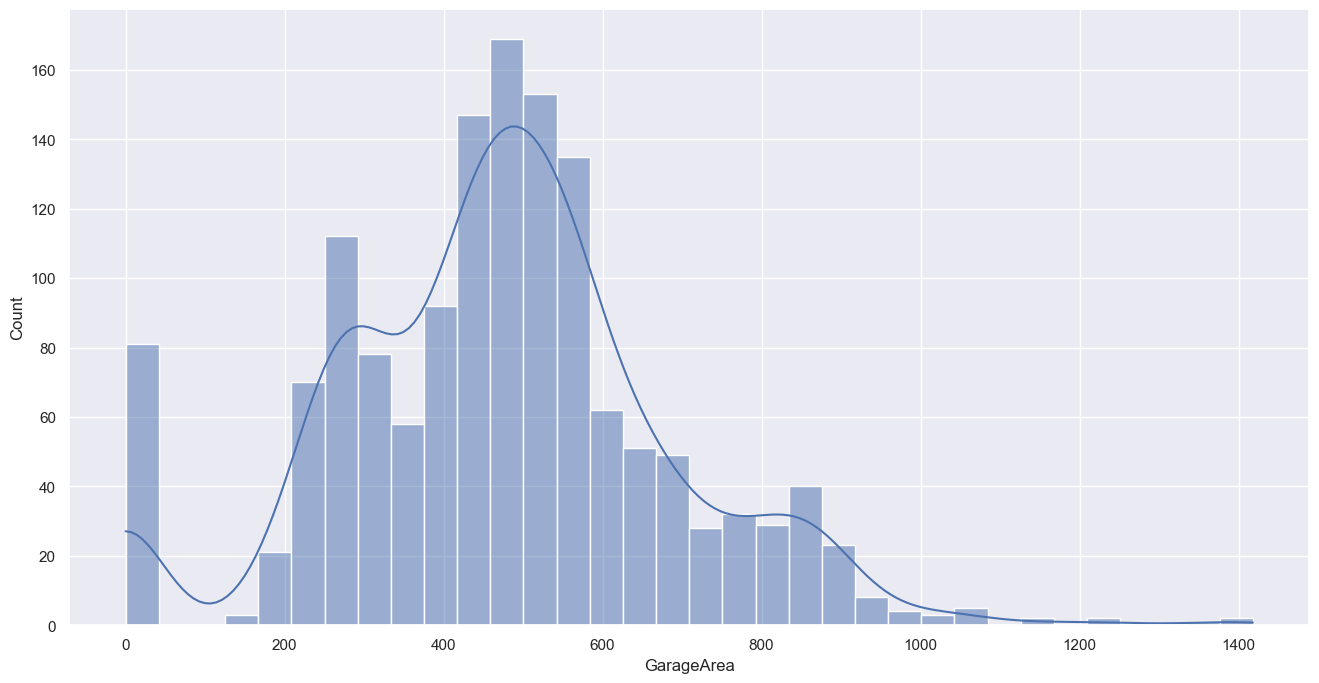

In [6]:
f = plt.figure(figsize = (16,8))
sb.histplot(data = LotArea, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = GrLivArea, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = TotalBsmtSF, kde = True)
f = plt.figure(figsize = (16,8))
sb.histplot(data = GarageArea, kde = True)

#### b) Answer: Based on the above visuals of histograms and KDEs, we can clearly tell that LotArea has the most skewed result, with it being heavily skewed to the right A.K.A positive skew

### C) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

#### To check which 2 variables would be able to assist us to predict SalePrice, we can calculate the correlation value of each variable

In [7]:
def findCorrelations(df1, df2):
    return df1.corr(df2)


print("LotArea corr: ", findCorrelations(LotArea, SalePrice))
print("GrLivArea corr: ", findCorrelations(GrLivArea, SalePrice))
print("TotalBsmtSF corr: ", findCorrelations(TotalBsmtSF, SalePrice))
print("GarageArea corr: ", findCorrelations(GarageArea, SalePrice))

LotArea corr:  0.26384335387140556
GrLivArea corr:  0.7086244776126518
TotalBsmtSF corr:  0.6135805515591953
GarageArea corr:  0.6234314389183616


#### c) Answer: Based on the respective correlation values calculated above, we can conclude that the top 2 variable we can use to predict SalePrice are 'GrLivArea' and 'GarageArea'. This is because them both have the top 2 highest correlation value to SalesPrice.




# Problem 2: Analysis of Categorical Variables

### Once again, loading the necessary columns into variables for ease of use below

In [9]:
MSSubClass = exerciseData['MSSubClass']
Neighborhood = exerciseData['Neighborhood']
BldgType = exerciseData['BldgType']
OverallQual = exerciseData['OverallQual']

## a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

### Based on the data_description.txt file provided, we can infer the following, 'MSSubClass' has 16 levels, 'Neighborhood' has 25 levels, 'BldgType' has 5 levels, and 'OverallQual' has 10 levels.

### Since Neighbourhood has the most number of levels, now we calculate which of the levels has the highest number of houses.

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

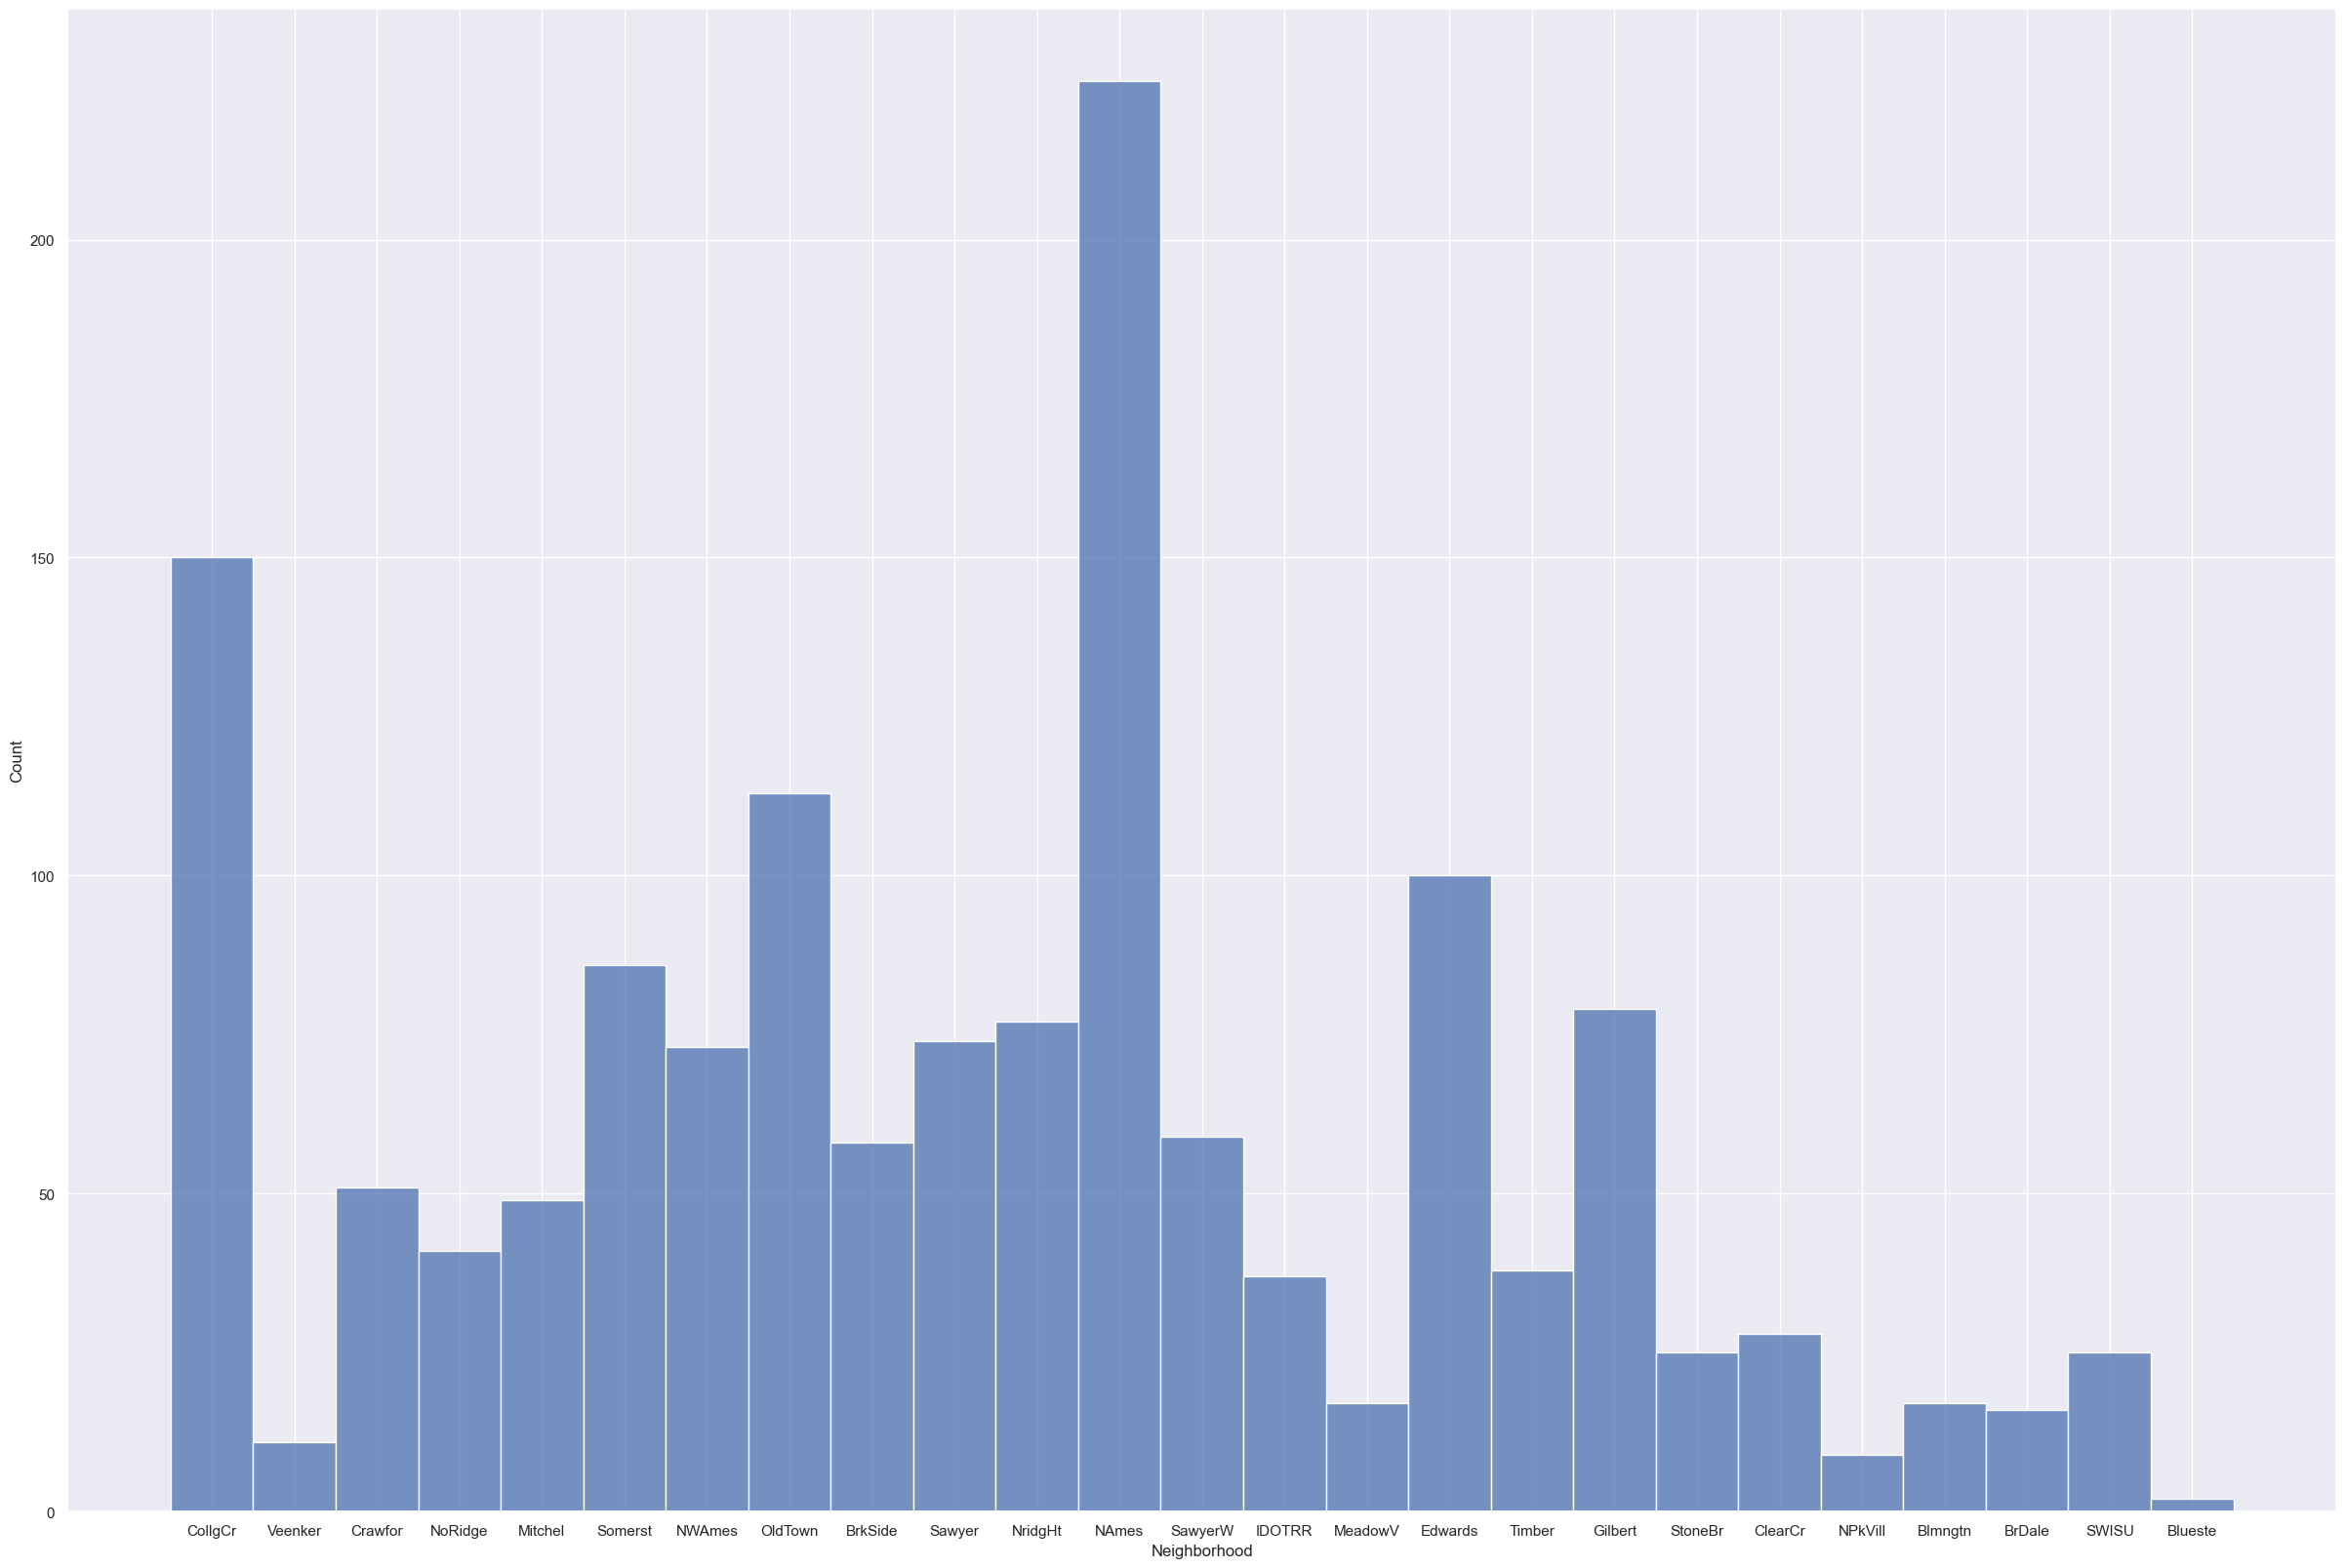

In [10]:
f = plt.figure(figsize = (30, 20))
sb.histplot(Neighborhood, stat = 'count')
Neighborhood.describe()

### From the table and histogram above, we can see that the level 'NAmes' has the most number of houses with the value of 225

## b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

### For this, we first plot a boxplot

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

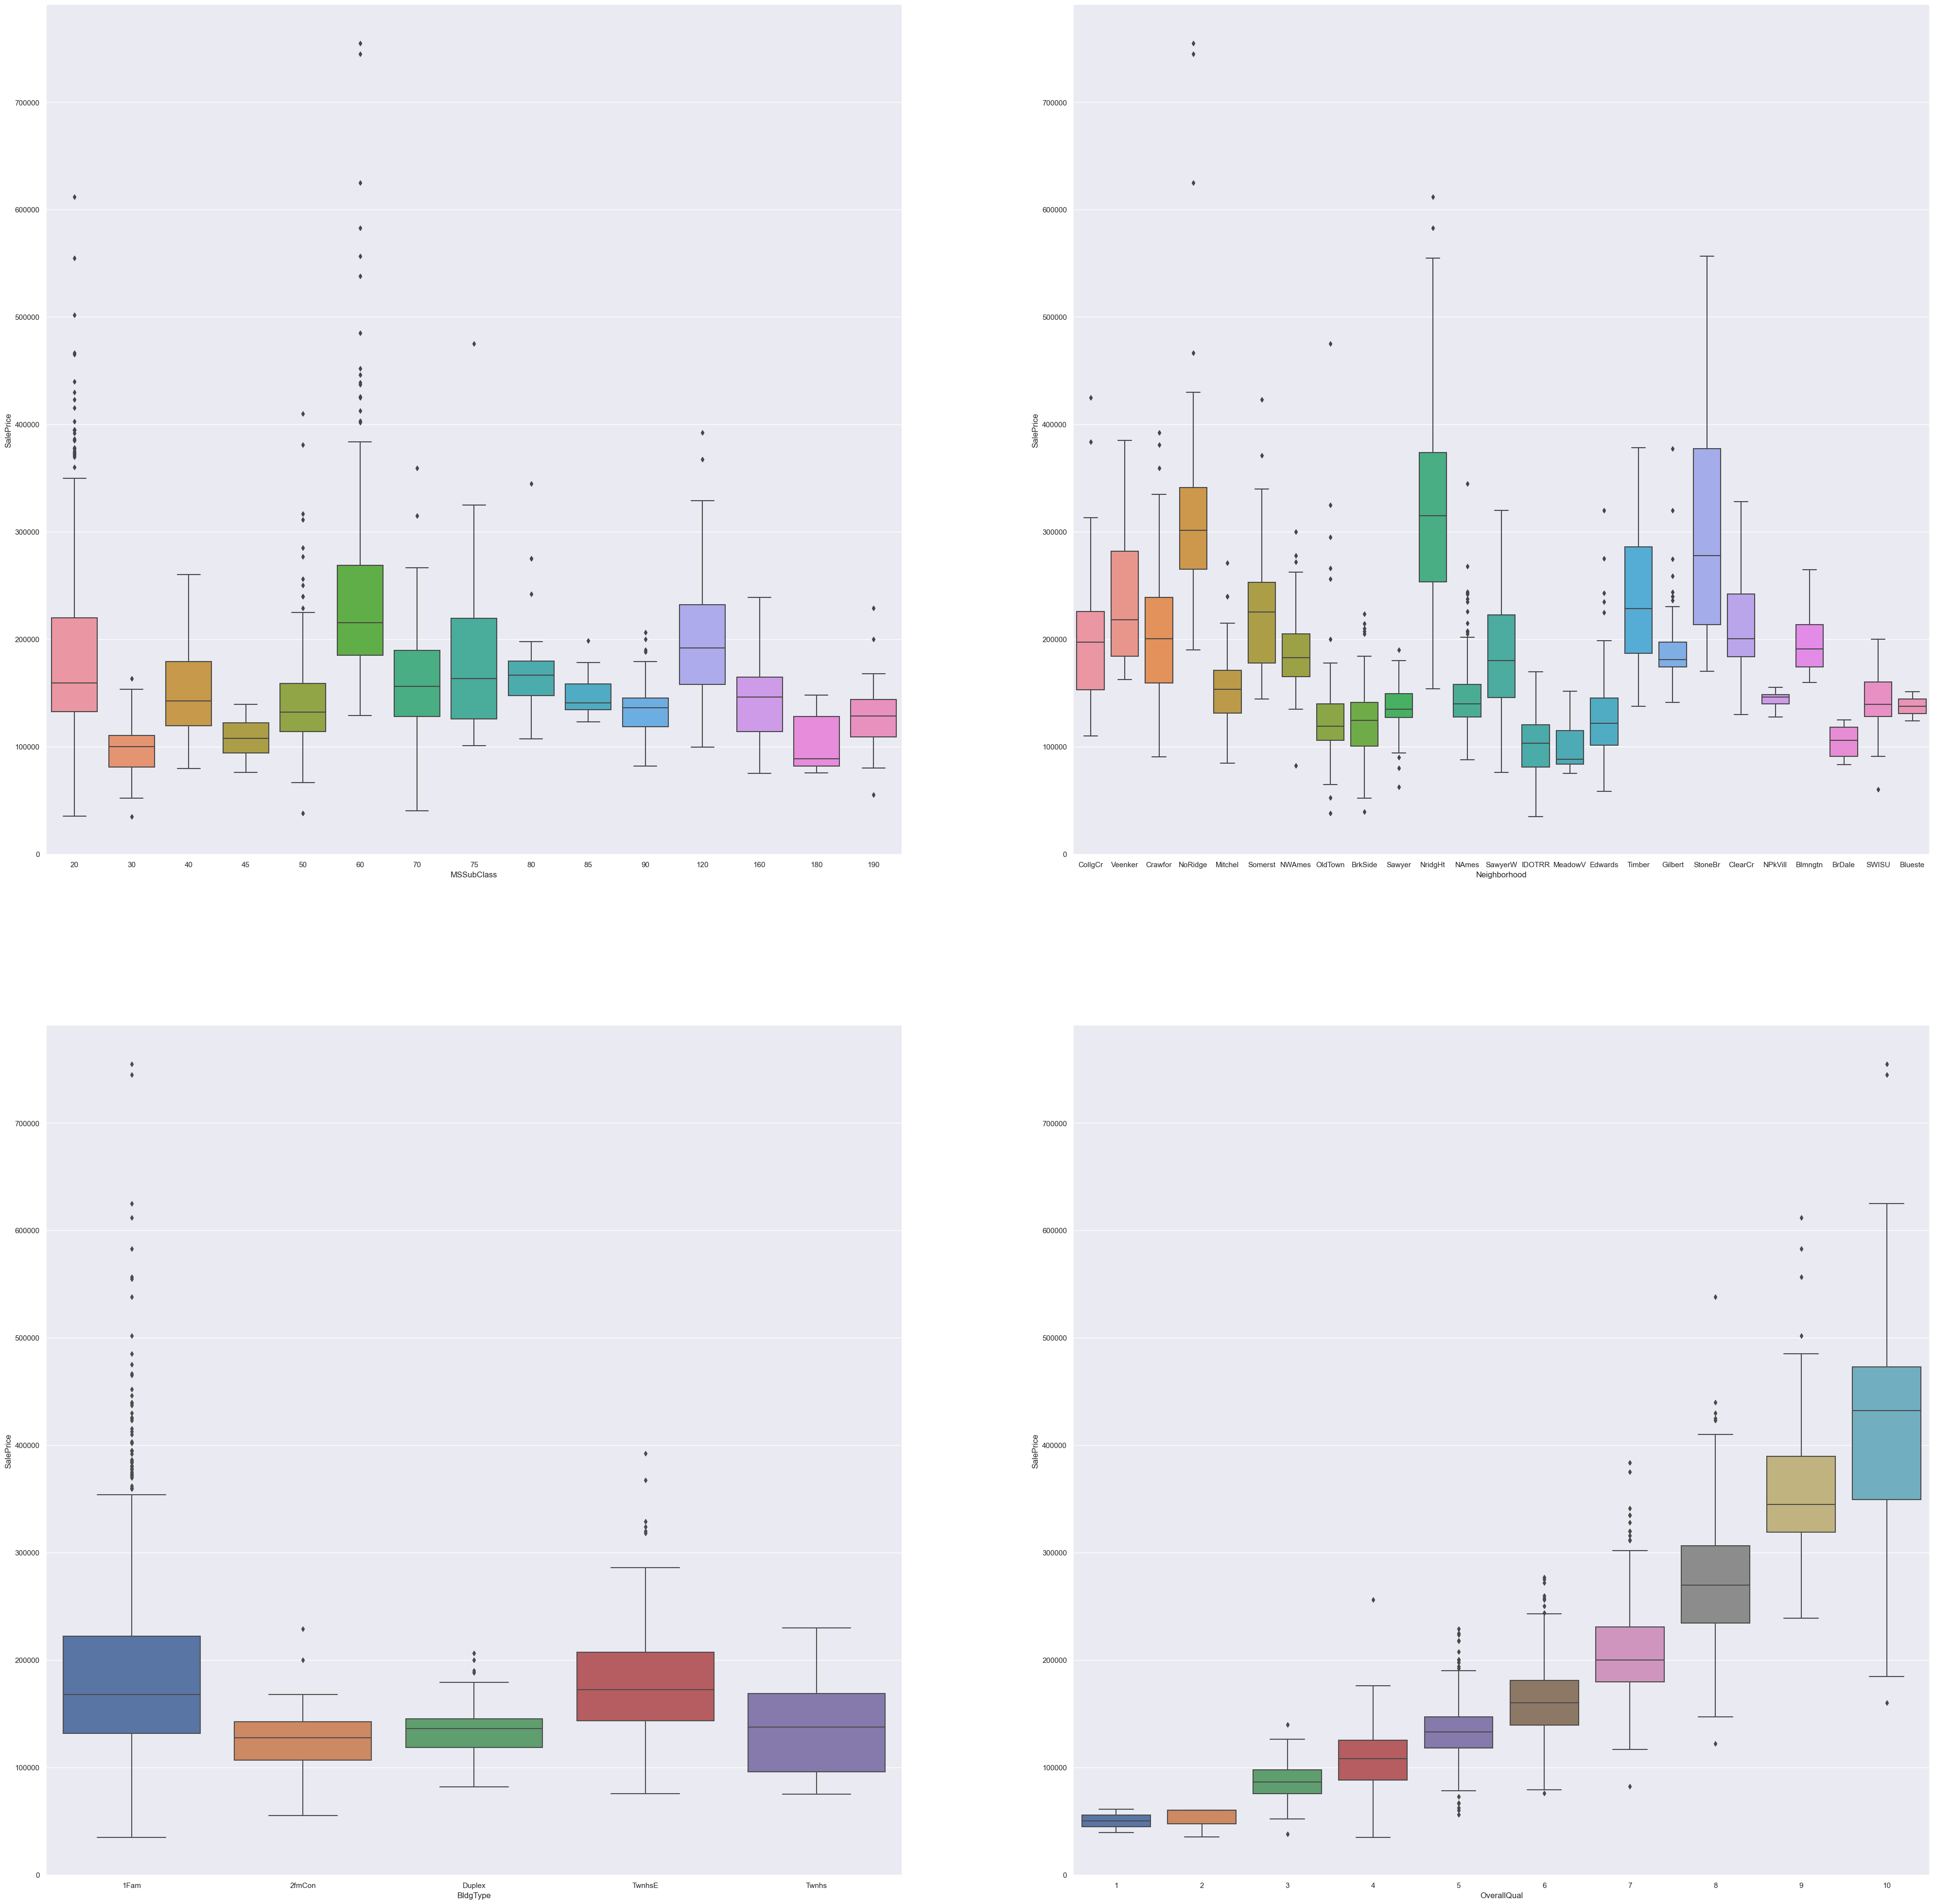

In [14]:
f, axes = plt.subplots(2, 2, figsize=(50, 50))
sb.boxplot(x= "MSSubClass", y= "SalePrice", data=exerciseData, ax = axes[0,0])
sb.boxplot(x= "Neighborhood", y= "SalePrice", data=exerciseData, ax = axes[0,1])
sb.boxplot(x= "BldgType", y= "SalePrice", data=exerciseData, ax = axes[1,0])
sb.boxplot(x= "OverallQual", y= "SalePrice", data=exerciseData, ax = axes[1,1])

### Based on the bar-plots provided, my analysis suggests that the two most influential variables for predicting the 'SalePrice' of houses in this dataset are 'Neighborhood' and 'OverallQual'. The correlation between 'OverallQual' and 'SalePrice' is evident from the box-plot, indicating a positive relationship between the quality level and sale price. Utilizing the 'OverallQual' metric, we can effectively estimate the 'SalePrice' of a particular house by assessing its quality level. Additionally, 'Neighborhood' emerges as a significant predictor due to the observable distribution patterns within each neighborhood category. Unlike 'MSSubClass', the 'SalePrice' distribution across different neighborhoods exhibits a bell-shaped curve with fewer outliers. Consequently, knowing the neighborhood allows for a more accurate prediction of 'SalePrice' by considering the average price within that locality, its respective distribution, and other pertinent factors.




# Problem 3 : Interesting Questions for EDA

## b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

### After reviewing the data_description file, I identified 'YearBuilt' and 'YearRemodAdd' as relevant variables for this specific problem. However, considering that some houses haven't undergone any remodeling since their construction and others have been remodeled after being sold, a new variable called 'houseAge' can be defined as follows:

### Exclude houses that have never been remodeled, i.e., where 'YearBuilt' is equal to 'YearRemodAdd'.

### Exclude houses that were remodeled after being sold.

### Calculate the age of the house based on the most recent remodel year and the year it was sold.

In [15]:
# exclude houses that was never remodeled
df = exerciseData.drop(
    exerciseData[exerciseData["YearBuilt"] == exerciseData["YearRemodAdd"]].index
)
# exclude houses that was remodeled after it was sold
df = df.drop(df[df["YearRemodAdd"] > df["YrSold"]].index)

# calculate houseAge
houseAge = df["YrSold"] - df["YearRemodAdd"]
houseAge.head()

2     6
3    36
5    14
6     2
8    58
dtype: int64

### Next, we would want to detect outliers and any possible anormalies in the data. We can do this using our countOutliers function previously declared.

In [16]:
print("Number of outliers in houseAge: ", countOutliers(houseAge))

Number of outliers in houseAge:  0


### And from the result, we can conclude there are no outliers in houseAge

### It is indeed reasonable to hypothesize that 'houseAge' may exhibit a negative correlation with 'SalePrice' since newer houses typically hold greater appeal to buyers compared to older ones. To confirm this hypothesis, a statistical test such as a correlation analysis can be conducted between 'houseAge' and 'SalePrice'. This analysis will help determine the strength and direction of the relationship between the age of the house and its sale price.

Correlation value:  -0.4502294083841027


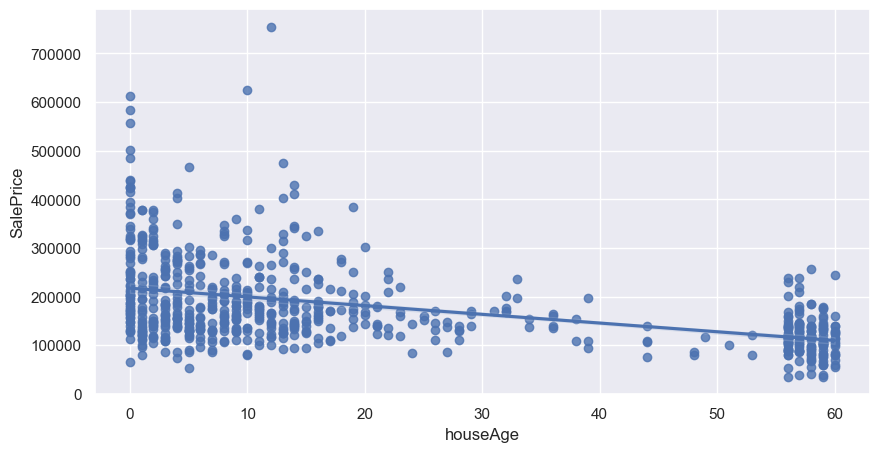

In [19]:
f = plt.figure(figsize=(10, 5))
x, y = pd.Series(houseAge, name="houseAge"), pd.Series(df['SalePrice'], name="SalePrice")
sb.regplot(x = x, y = y)
print("Correlation value: ", findCorrelations(houseAge, SalePrice))

### Based on the graph and the output from the findCorrelation function, it's evident that 'houseAge' and 'SalePrice' exhibit a negative correlation, with a correlation coefficient of 0.450, indicating a moderate level of correlation. Furthermore, the graph suggests that houses with an age below 20 years are more desirable to customers, as evidenced by the higher density of data points when 'houseAge' is less than 30.

### Moreover, it's noteworthy that some houses that have never been remodeled still command higher sale prices than houses with lower 'houseAge'. This observation suggests that 'SalePrice' is influenced by other variables as well. To delve deeper into understanding these relationships, further analysis is warranted.